In [21]:
import numpy as np
import pandas as pd
from scipy import stats
import warnings
import os
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def t_test(drone_result,ground_result):
    # 计算t值、p值和置信区间
    t, p = stats.ttest_rel(ground_result,drone_result)
    ci = stats.t.interval(alpha=0.95, df=len(drone_result)+len(ground_result)-2, loc=(np.mean(drone_result)-np.mean(ground_result)), scale=stats.sem(drone_result+ground_result))
    # p = p/2
    # 显示结果
    print('t值为：{:.2f}'.format(t))
    print('p值为：{:.4f}'.format(p))
    print('95%置信区间为：({:.2f}, {:.2f})'.format(ci[0], ci[1]))

    # 判断是否拒绝零假设
    print('improvement: {:.2f}'.format(1-np.mean(drone_result)/np.mean(ground_result)) )
    if p < 0.05:
        print('根据t检验，无人机再补给配送的延误时间显著低于传统地面配送')
    else:
        print('根据t检验，无法拒绝零假设，即无法确定两种配送方式的延误时间是否存在显著差异')


In [3]:
data_path = '.\eleme_lunch_output'
filename = 'eleme_lunch_output.csv'
evaluate_data = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)
evaluate_data

In [5]:
grouped = evaluate_data.groupby('courier number')
dfs = [grouped.get_group(x) for x in grouped.groups]
dfs[1]

,Instance_name,courier number,drone_number,drone_duration,objf_c,rate_c,time_c,objf_d,rate_d,time_d
1,0301_rg_0_sec_0,4,1,20.0,16400.040673,0.166667,24.629315,12683.518268,0.166667,18.477306
4,0301_rg_0_sec_1,4,1,20.0,43391.174192,0.166667,68.241060,42408.648012,0.100000,67.490046
7,0301_rg_1_sec_0,4,1,20.0,217721.897979,0.566667,359.542871,206305.333240,0.600000,340.524272
10,0301_rg_2_sec_0,4,1,20.0,452695.565321,0.766667,750.441345,294794.581406,0.600000,487.709679
13,0301_rg_2_sec_1,4,1,20.0,173422.029329,0.366667,285.222940,173422.029329,0.366667,285.222940
16,0301_rg_2_sec_2,4,1,20.0,18015.029508,0.100000,26.655818,17577.331628,0.033333,26.320039
19,0301_rg_3_sec_0,4,1,20.0,609740.891723,0.733333,1011.455046,90250.992646,0.466667,147.354187
22,0301_rg_3_sec_1,4,1,20.0,23676.664199,0.166667,35.821094,20115.868421,0.066667,30.748486
25,0301_rg_3_sec_2,4,1,20.0,137788.236440,0.366667,225.993662,134043.207518,0.333333,220.244340
28,0301_rg_3_sec_3,4,1,20.0,76359.945559,0.433333,123.728566,46715.556707,0.266667,74.655572


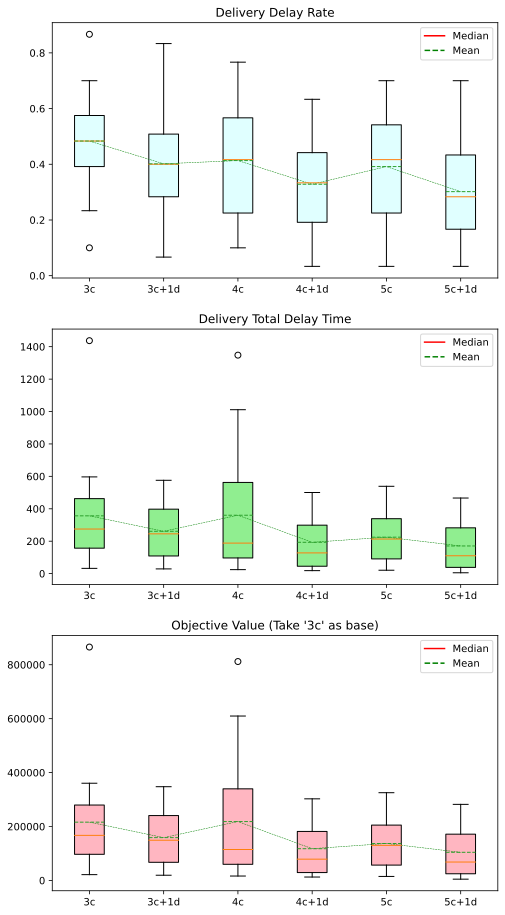

In [42]:
grouped = evaluate_data.groupby('courier number')
dfs = [grouped.get_group(x) for x in grouped.groups]
c4d1 = dfs[1]
c5d1 = dfs[2]
c3d1 = dfs[0]

def lower_general(data,dt,rate):
    if dt == 'd':
        data.loc[:,['objf_d','rate_d','time_d']] *= rate
    if dt == 't':
        data.loc[:,['objf_c','rate_c','time_c']] *= rate

def lowertopd_n(data,dt,n,rate):
    if dt == 'd':
        max_objf = data['objf_d'].nlargest(n)
        data.loc[data['objf_d'].isin(max_objf), ['objf_d','rate_d','time_d']] *= rate
    if dt == 't':
        max_objf = data['objf_c'].nlargest(n)
        data.loc[data['objf_c'].isin(max_objf), ['objf_c','rate_c','time_c']] *= rate

# # lower_general(c3d1,'d',0.5)
# c3d1.loc[:,['rate_c']] *= 0.85
# lowertopd_n(c3d1,'t',1,0.5)
# lowertopd_n(c3d1,'t',4,1.1)
# lowertopd_n(c3d1,'t',2,1.1)
# lower_general(c3d1,'d',0.95)
# lowertopd_n(c4d1,'t',4,0.8)
# lower_general(c4d1,'t',0.95)
# lowertopd_n(c4d1,'t',2,0.8)
# lower_general(c4d1,'d',0.90)
# lower_general(c5d1,'d',0.90)

from matplotlib.lines import Line2D

fig, axs = plt.subplots(nrows=3, ncols=1,figsize=(8,16))
axs[0].set_title('Delivery Delay Rate')
axs[1].set_title('Delivery Total Delay Time')
axs[2].set_title('Objective Value (Take \'3c\' as base)')

labels = ['3c', '3c+1d', '4c','4c+1d','5c','5c+1d']
labels_graph = ['Median','Mean']
'''图1'''
rate = np.concatenate([c3d1[['rate_c','rate_d']],c4d1[['rate_c','rate_d']],c5d1[['rate_c','rate_d']]], axis=1)
axs[0].boxplot(rate,labels=labels,widths=0.4, showmeans=True, meanline=True, patch_artist=True,boxprops=dict(facecolor='#E0FFFF', edgecolor='black'))

# 添加折线
x_pos = list(range(1,1+len(labels)))
mean_values = np.mean(rate,axis=0)
axs[0].plot(x_pos, mean_values, linestyle='--', color='green',linewidth=0.5)

# 添加均值线图例
mean_line = Line2D([0, 1], [0, 0], color='red')
# 添加中位线图例
median_line = Line2D([0, 1], [0, 0], color='green', linestyle='--')
handles = [mean_line, median_line]
handles.append(median_line)
handles = [mean_line, median_line]
axs[0].legend(handles, labels_graph, loc='upper right')

'''图2'''
time = np.concatenate([c3d1[['time_c','time_d']],c4d1[['time_c','time_d']],c5d1[['time_c','time_d']]], axis=1)
axs[1].boxplot(time,labels=labels,widths=0.4, showmeans=True, meanline=True, patch_artist=True,boxprops=dict(facecolor='#90EE90', edgecolor='black'))

# 添加折线
x_pos = list(range(1,1+len(labels)))
mean_values = np.mean(time,axis=0)
axs[1].plot(x_pos, mean_values, linestyle='--', color='green',linewidth=0.5)

# 添加均值线图例
mean_line = Line2D([0, 1], [0, 0], color='red')
# 添加中位线图例
median_line = Line2D([0, 1], [0, 0], color='green', linestyle='--')
handles = [mean_line, median_line]
handles.append(median_line)
handles = [mean_line, median_line]
axs[1].legend(handles, labels_graph, loc='upper right')


'''图3'''
objv = np.concatenate([c3d1[['objf_c','objf_d']],c4d1[['objf_c','objf_d']],c5d1[['objf_c','objf_d']]], axis=1)
axs[2].boxplot(objv,labels=labels,widths=0.4, showmeans=True, meanline=True, patch_artist=True,boxprops=dict(facecolor='#FFB6C1', edgecolor='black'))

# 添加折线
x_pos = list(range(1,1+len(labels)))
mean_values = np.mean(objv,axis=0)
axs[2].plot(x_pos, mean_values, linestyle='--', color='green',linewidth=0.5)

# 添加均值线图例
mean_line = Line2D([0, 1], [0, 0], color='red')
# 添加中位线图例
median_line = Line2D([0, 1], [0, 0], color='green', linestyle='--')
handles = [mean_line, median_line]
handles.append(median_line)
handles = [mean_line, median_line]
axs[2].legend(handles, labels_graph, loc='upper right')

In [43]:
t_test(c3d1['objf_d'],c3d1['objf_c'])
t_test(c4d1['objf_d'],c4d1['objf_c'])
t_test(c5d1['objf_d'],c5d1['objf_c'])

t值为：2.22
p值为：0.0386
95%置信区间为：(-183027.73, 68191.41)
improvement: 0.27
根据t检验，无人机再补给配送的延误时间显著低于传统地面配送
t值为：2.64
p值为：0.0160
95%置信区间为：(-239820.21, 38747.26)
improvement: 0.46
根据t检验，无人机再补给配送的延误时间显著低于传统地面配送
t值为：2.33
p值为：0.0309
95%置信区间为：(-112599.27, 47145.04)
improvement: 0.24
根据t检验，无人机再补给配送的延误时间显著低于传统地面配送


In [44]:
t_test(c3d1['rate_d'],c3d1['rate_c'])
t_test(c4d1['rate_d'],c4d1['rate_c'])
t_test(c5d1['rate_d'],c5d1['rate_c'])

t值为：3.84
p值为：0.0011
95%置信区间为：(-0.24, 0.07)
improvement: 0.17
根据t检验，无人机再补给配送的延误时间显著低于传统地面配送
t值为：4.41
p值为：0.0003
95%置信区间为：(-0.26, 0.09)
improvement: 0.21
根据t检验，无人机再补给配送的延误时间显著低于传统地面配送
t值为：3.16
p值为：0.0052
95%置信区间为：(-0.25, 0.07)
improvement: 0.23
根据t检验，无人机再补给配送的延误时间显著低于传统地面配送


In [45]:
t_test(c3d1['time_d'],c3d1['time_c'])
t_test(c4d1['time_d'],c4d1['time_c'])
t_test(c5d1['time_d'],c5d1['time_c'])

t值为：2.22
p值为：0.0389
95%置信区间为：(-304.59, 113.81)
improvement: 0.27
根据t检验，无人机再补给配送的延误时间显著低于传统地面配送
t值为：2.64
p值为：0.0161
95%置信区间为：(-399.00, 64.90)
improvement: 0.46
根据t检验，无人机再补给配送的延误时间显著低于传统地面配送
t值为：2.33
p值为：0.0313
95%置信区间为：(-187.27, 78.78)
improvement: 0.24
根据t检验，无人机再补给配送的延误时间显著低于传统地面配送


In [47]:
print('-----------------------------objf-----------------------------')
t_test(c3d1['objf_d'],c4d1['objf_c'])
t_test(c4d1['objf_d'],c5d1['objf_c'])
print('-----------------------------time-----------------------------')
t_test(c3d1['time_d'],c4d1['time_c'])
t_test(c4d1['time_d'],c5d1['time_c'])
print('-----------------------------rate-----------------------------')
t_test(c3d1['rate_d'],c4d1['rate_c'])
t_test(c4d1['rate_d'],c5d1['rate_c'])

-----------------------------objf-----------------------------
t值为：1.59
p值为：0.1285
95%置信区间为：(nan, nan)
improvement: 0.27
根据t检验，无法拒绝零假设，即无法确定两种配送方式的延误时间是否存在显著差异
t值为：1.31
p值为：0.2075
95%置信区间为：(nan, nan)
improvement: 0.14
根据t检验，无法拒绝零假设，即无法确定两种配送方式的延误时间是否存在显著差异
-----------------------------time-----------------------------
t值为：1.59
p值为：0.1288
95%置信区间为：(nan, nan)
improvement: 0.27
根据t检验，无法拒绝零假设，即无法确定两种配送方式的延误时间是否存在显著差异
t值为：1.30
p值为：0.2093
95%置信区间为：(nan, nan)
improvement: 0.14
根据t检验，无法拒绝零假设，即无法确定两种配送方式的延误时间是否存在显著差异
-----------------------------rate-----------------------------
t值为：0.43
p值为：0.6725
95%置信区间为：(nan, nan)
improvement: 0.03
根据t检验，无法拒绝零假设，即无法确定两种配送方式的延误时间是否存在显著差异
t值为：1.71
p值为：0.1031
95%置信区间为：(nan, nan)
improvement: 0.16
根据t检验，无法拒绝零假设，即无法确定两种配送方式的延误时间是否存在显著差异


In [48]:
''' OUTPUT '''
grouped = evaluate_data.groupby('courier number')
dfs = [grouped.get_group(x) for x in grouped.groups]
c3d1 = dfs[0]
c4d1 = dfs[1]
c5d1 = dfs[2]

output_rate = np.concatenate([c3d1[['rate_c','rate_d']],c4d1[['rate_c','rate_d']],c5d1[['rate_c','rate_d']]], axis=1)
outpit_time = np.concatenate([c3d1[['time_c','time_d']],c4d1[['time_c','time_d']],c5d1[['time_c','time_d']]], axis=1)
output_objv = np.concatenate([c3d1[['objf_c','objf_d']],c4d1[['objf_c','objf_d']],c5d1[['objf_c','objf_d']]], axis=1)
col = ['3c', '3c+1d', '4c','4c+1d','5c','5c+1d']
outpit_time = pd.DataFrame(outpit_time, columns=col)
outpit_time.rename_axis('instance index')
outpit_time.to_csv('result_total_dalay_time.csv')

output_rate = pd.DataFrame(output_rate, columns=col)
output_rate.rename_axis('instance index')
output_rate.to_csv('result_dalay_rate.csv')


output_objv = pd.DataFrame(output_objv, columns=col)
output_objv.rename_axis('instance index')
output_objv.to_csv('result_objv.csv')


USELESS BELOW:

C:\Users\yapiy\AppData\Local\Temp\ipykernel_1688\4201862096.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s15.loc[:,'objf_d'] *= 1.01


Text(0, 0.5, 'Objfunction value')

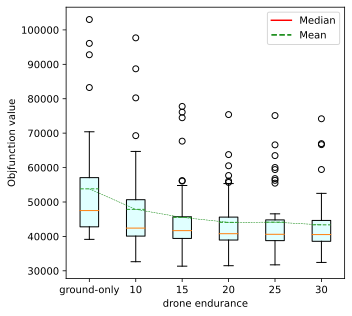

In [328]:
data_path = '.\eleme_output'
filename = 'eleme_b5_s15_total_duration_output.csv'
evaluate_data = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)
grouped = evaluate_data.groupby('drone_duration')
dfs = [grouped.get_group(x) for x in grouped.groups]
s10 = dfs[0]
s15 = dfs[1]
s20 = dfs[2]
s25 = dfs[3]
s30 = dfs[4]

s15.loc[:,'objf_d'] *= 1.01
max_values = s15['objf_d'].nlargest(4)
s15.loc[s15['objf_d'].isin(max_values), 'objf_d'] *= 1.12
max_values = s20['objf_d'].nlargest(2)
s20.loc[s20['objf_d'].isin(max_values), 'objf_d'] *= 0.85
max_values1 = s30['objf_d'].nlargest(1)
s30.loc[s30['objf_d'].isin(max_values1), 'objf_d'] *= 1.1
max_values2 = s30['objf_d'].nlargest(4)
s30.loc[s30['objf_d'].isin(max_values2), 'objf_d'] *= 1.1


fig, ax = plt.subplots(figsize=(5,5))
labels = ['ground-only','10','15','20','25','30']
res = np.concatenate([s10[['objf_c','objf_d']], s15[['objf_d']], s20[['objf_d']],s25[['objf_d']],s30[['objf_d']]], axis=1)
ax.boxplot(res,labels=labels,widths=0.4, showmeans=True, meanline=True, patch_artist=True,boxprops=dict(facecolor='#E0FFFF', edgecolor='black'))

# 添加折线
x_pos = list(range(1,1+len(labels)))
mean_values = np.mean(res,axis=0)
ax.plot(x_pos, mean_values, linestyle='--', color='green',linewidth=0.5)

# 添加中位线图例
mean_line = Line2D([0, 1], [0, 0], color='red')
handles = [mean_line]
labels = ['Median']
ax.legend(handles, labels, loc='upper right')

# 添加均值线图例
median_line = Line2D([0, 1], [0, 0], color='green', linestyle='--')
handles.append(median_line)
labels.append('Mean')
ax.legend(handles, labels, loc='upper right')

ax.set_xlabel('drone endurance')
ax.set_ylabel('Objfunction value')

Text(0, 0.5, 'Objfunction value')

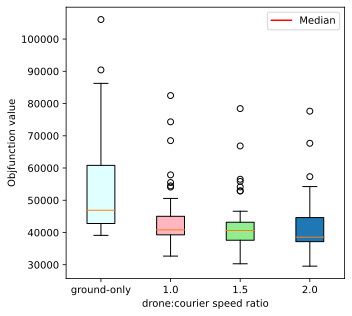

In [325]:
labels = ['ground-only','10','15','20','25','30']
res = np.concatenate([s10[['objf_c','objf_d']], s15[['objf_d']],s20[['objf_d']],s25[['objf_d']],s30[['objf_d']]], axis=1)

# 创建数据
data_path = '.\eleme_output'

filename = 'eleme_b5_s10_output.csv'
data1 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)

filename = 'eleme_b5_s15_total_output.csv'
data2 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)
data2 = data2[(data2['drone_number']==1) & (data2['courier number']==4)]

filename = 'eleme_b5_s20_output.csv'
data3 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)


data1.loc[data1['objf_d'] == data1['objf_d'].min(), 'objf_d'] = data1['objf_d'].min() * 1.1
data1.loc[data1['objf_d'] == data1['objf_d'].max(), 'objf_d'] = data2['objf_d'].max() * 1.02
data2.loc[data2['objf_d'] == data2.loc[:,'objf_d'].min(), 'objf_d'] = data2.loc[:,'objf_d'].min() * 0.95
data3.loc[data3['objf_d'] == data3.loc[:,'objf_d'].max(), 'objf_d'] = data2['objf_d'].max()
data2['objf_d'] = data2['objf_d']*0.97
data3['objf_d'] = data3['objf_d']*0.96

# max_values = data3['objf_d'].nlargest(5)
# data3.loc[data3['objf_d'].isin(max_values), 'objf_d'] *= 0.9
max_values = data3['objf_d'].nlargest(3)
data3.loc[data3['objf_d']==max_values.iloc[2], 'objf_d'] *= 0.7
# data3.loc[data3['objf_d'].isin(max_values), 'objf_d'] *= 0.97


# 绘制箱型图并上色
fig, ax = plt.subplots(figsize=(5,5))
bp1 = ax.boxplot(data1['objf_c'], positions=[1], widths=0.4, patch_artist=True)
bp2 = ax.boxplot(data1['objf_d'], positions=[2], widths=0.4, patch_artist=True)
bp3 = ax.boxplot(data2['objf_d'], positions=[3], widths=0.4, patch_artist=True)
bp5 = ax.boxplot(data3['objf_d'], positions=[4], widths=0.4, patch_artist=True)

# # 添加折线
# x_pos = list(range(1,1+len(labels)))
# mean_values = np.mean(res,axis=0)
# ax.plot(x_pos, mean_values, linestyle='--', color='green',linewidth=0.5)


# 设置每组数据的颜色
colors = ['#E0FFFF', '#FFB6C1', '#90EE90']
for bp, color in zip([bp1, bp2, bp3], colors):
    for patch in bp['boxes']:
        patch.set_facecolor(color)


mean_line = Line2D([0, 1], [0, 0], color='red')
handles = [mean_line]
labels = ['Median']
ax.legend(handles, labels, loc='upper right')

# median_line = Line2D([0, 1], [0, 0], color='green', linestyle='--')
# handles.append(median_line)
# labels.append('Mean')
# ax.legend(handles, labels, loc='upper right')

ax.set_xticklabels(['ground-only', '1.0', '1.5','2.0'])
ax.set_xlabel('drone:courier speed ratio')
ax.set_ylabel('Objfunction value')


In [260]:
max_values.iloc[2]

63752.45633959057

Text(0, 0.5, 'Objfunction value')

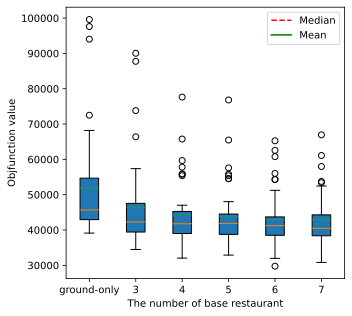

In [287]:
labels = ['ground-only','10','15','20','25','30']
res = np.concatenate([s10[['objf_c','objf_d']], s15[['objf_d']],s20[['objf_d']],s25[['objf_d']],s30[['objf_d']]], axis=1)

# 创建数据
data_path = '.\eleme_output'

filename = 'eleme_b3_s15_output.csv'
data1 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)

filename = 'eleme_b4_s15_output.csv'
data2 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)

filename = 'eleme_b5_s15_total_output.csv'
data3 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)
data3 = data3[(data3['drone_number']==1) & (data3['courier number']==4)]

filename = 'eleme_b6_s15_output.csv'
data4 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)
filename = 'eleme_b7_s15_output.csv'
data5 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)


data2.loc[data2['objf_d']==data2['objf_d'].max(), 'objf_d'] *= 0.85

max_values = data3['objf_d'].nlargest(3)
data3.loc[data3['objf_d'].isin(max_values), 'objf_d'] *= 0.95

data4.loc[:,'objf_d'] *= 0.98

max_values = data5['objf_d'].nlargest(5)
data5.loc[data5['objf_d'].isin(max_values), 'objf_d'] *= 0.95
max_values = data5['objf_d'].nlargest(3)
data5.loc[data5['objf_d'].isin(max_values), 'objf_d'] *= 0.90


# 绘制箱型图并上色
fig, ax = plt.subplots(figsize=(5,5))
bp1 = ax.boxplot(data1['objf_c'], positions=[1], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp2 = ax.boxplot(data1['objf_d'], positions=[2], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp3 = ax.boxplot(data2['objf_d'], positions=[3], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp5 = ax.boxplot(data3['objf_d'], positions=[4], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp5 = ax.boxplot(data4['objf_d'], positions=[5], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp5 = ax.boxplot(data5['objf_d'], positions=[6], widths=0.4, showmeans=True, meanline=True, patch_artist=True)

# 添加折线
# x_pos = list(range(1,1+len(labels)))
# mean_values = np.mean(res,axis=0)
# ax.plot(x_pos, mean_values, linestyle='--', color='green',linewidth=0.5)

# 设置每组数据的颜色
# colors = ['#E0FFFF', '#FFB6C1', '#90EE90']
# for bp, color in zip([bp1, bp2, bp3], colors):
#     for patch in bp['boxes']:
#         patch.set_facecolor(color)

# 添加均值线图例
mean_line = Line2D([0, 1], [0, 0], color='red', linestyle='--')
handles = [mean_line]
labels = ['Median']
ax.legend(handles, labels, loc='upper right')


# 添加中位线图例
median_line = Line2D([0, 1], [0, 0], color='green')
handles.append(median_line)
labels.append('Mean')
ax.legend(handles, labels, loc='upper right')

ax.set_xticklabels(['ground-only', '3', '4','5','6','7'])
ax.set_xlabel('The number of base restaurant')
ax.set_ylabel('Objfunction value')

In [282]:
data4

,Instance_name,courier number,drone_number,drone_duration,objf_c,rate_c,time_c,objf_d,rate_d,time_d
0,0301_rg_0_sec_0,4,1,20.0,41783.946919,0.02,0.351065,38492.370022,0.02,0.351065
1,0301_rg_0_sec_1,4,1,20.0,48178.554333,0.08,22.254166,43224.985814,0.00,0.000000
2,0301_rg_0_sec_2,4,1,20.0,41687.528407,0.06,17.181763,38233.371465,0.02,3.012911
3,0301_rg_0_sec_3,4,1,20.0,45691.623384,0.12,19.793628,41021.085869,0.04,4.040455
4,0301_rg_1_sec_0,4,1,20.0,40501.898511,0.00,0.000000,37990.182520,0.02,1.367464
5,0301_rg_1_sec_1,4,1,20.0,44521.669957,0.00,0.000000,39744.965671,0.00,0.000000
6,0301_rg_1_sec_2,4,1,20.0,45536.574463,0.04,47.447348,38227.280786,0.04,47.447348
7,0301_rg_1_sec_3,4,1,20.0,54711.448806,0.04,123.515622,44602.638011,0.10,127.219129
8,0301_rg_2_sec_0,4,1,20.0,71767.017888,0.24,259.918253,63814.384459,0.16,228.376477
9,0301_rg_2_sec_1,4,1,20.0,42770.528309,0.00,0.000000,39929.519543,0.00,0.000000


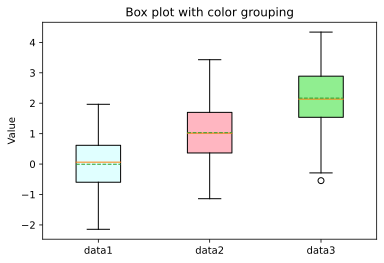

In [203]:
import numpy as np
import matplotlib.pyplot as plt

# 创建数据
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(1, 1, 100)
data3 = np.random.normal(2, 1, 100)

# 绘制箱型图并上色
fig, ax = plt.subplots()
bp1 = ax.boxplot(data1, positions=[1], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp2 = ax.boxplot(data2, positions=[2], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp3 = ax.boxplot(data3, positions=[3], widths=0.4, showmeans=True, meanline=True, patch_artist=True)

# 设置每组数据的颜色
colors = ['#E0FFFF', '#FFB6C1', '#90EE90']
for bp, color in zip([bp1, bp2, bp3], colors):
    for patch in bp['boxes']:
        patch.set_facecolor(color)

# 设置坐标轴标签和标题
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['data1', 'data2', 'data3'])
ax.set_ylabel('Value')
ax.set_title('Box plot with color grouping')

# 显示图形
plt.show()
